In [128]:
#Ryan Bockmon
'''
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv("/content/Iris.csv",sep=",")#reads in the data from a file
length = data["PetalLengthCm"]
width = data["PetalWidthCm"]
target = data["Species"]
x = []#list to hold the data point locations

for i in range(len(length)):
  x1 = length[i]
  x2 = width[i]
  x.append([x1,x2])#only gets the data that we want to use

num_C = 3 #number of clusters - *best way to find this is via elbow graph
num_inits = 10 #number of times k-means is ran
num_max_iter = 300 #number of iterations on a single k-means run
km = KMeans(n_clusters = num_C, n_init = num_inits, max_iter = num_max_iter)
y_km = km.fit_predict(x) #returns a list of what data point belongs in what cluster
c_centers = km.cluster_centers_#a list of cluster centers
print(y_km)
print(c_centers)
print(km.inertia_)#prints the SSE of the model
print((y_km == target).sum()/len(y_km))
"""used to visulize"""
k_clusters = {}

for i in range(num_C):#creats a dictionary where each key is a number of clusters
  k_clusters[str(i)] = [[],[]]#

print(k_clusters)

for i in range(num_C):#loops over the number of clusters
  for j in range(len(y_km)):#loops over every data point
    if(y_km[j] == i):#gets every point for each cluster
      n_x,n_y = x[j]
      lists = k_clusters[str(i)]#
      lists[0].append(n_x)
      lists[1].append(n_y)

print(k_clusters)

#graph the data so we can understand what is going on.
figure, ax = plt.subplots(nrows=1, ncols=2)#creates 2 subplots
groups = data.groupby("Species")#groups the data based on species name

for name, group in groups:
  x = group.PetalLengthCm
  y = group.PetalWidthCm
  ax[0].scatter(x, y)
  ax[0].set_title("Actual Data")

for i in k_clusters:#plots each cluster
  x,y = k_clusters[i]
  ax[1].scatter(x,y)

for i in c_centers:#plots the center of the clusters
  x,y = i
  ax[1].scatter(x,y, marker = "*", s = 200)
  ax[1].set_title("K-Means")
  ax[0].set_xlabel("petal length")
  ax[0].set_ylabel("petal width")
  ax[1].set_xlabel("petal length")
  ax[1].set_ylabel("petal width")

plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom sklearn.cluster import KMeans\n\ndata = pd.read_csv("/content/Iris.csv",sep=",")#reads in the data from a file\nlength = data["PetalLengthCm"]\nwidth = data["PetalWidthCm"]\ntarget = data["Species"]\nx = []#list to hold the data point locations\n\nfor i in range(len(length)):\n  x1 = length[i]\n  x2 = width[i]\n  x.append([x1,x2])#only gets the data that we want to use\n\nnum_C = 3 #number of clusters - *best way to find this is via elbow graph\nnum_inits = 10 #number of times k-means is ran\nnum_max_iter = 300 #number of iterations on a single k-means run\nkm = KMeans(n_clusters = num_C, n_init = num_inits, max_iter = num_max_iter)\ny_km = km.fit_predict(x) #returns a list of what data point belongs in what cluster\nc_centers = km.cluster_centers_#a list of cluster centers\nprint(y_km)\nprint(c_centers)\nprint(km.inertia_)#prints the SSE of the model\nprint((y_km == target).sum()/len(y_km))\n"""used to visulize"""\nk_cluste

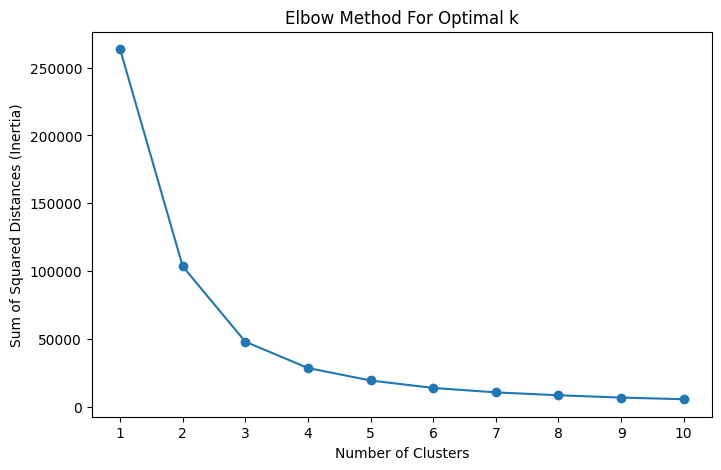

In [129]:
#Ryan Bockmon, modified by Cody Snow for HW7
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv("/content/Spotify_Youtube.csv",sep=",")#reads in the data from a file
liveness = data["Liveness"]
energy = data["Energy"]
loudness = data["Loudness"]
target = data["Artist"]
artists = data["Artist"].tolist()  # List of artist names for each data point to be used later
X = []#list to hold the data point locations

for i in range(len(liveness)):
  x1 = liveness[i]
  x2 = energy[i]
  x3 = loudness[i]
  X.append([x1,x2,x3])#only gets the data that we want to use

# Calculate inertia for different values of k (number of clusters)
sse = []  # Sum of squared distances
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.title("Elbow Method For Optimal k")
plt.xticks(k_range)
plt.show()

In [130]:
num_C = 3 #number of clusters - *best way to find this is via elbow graph, which I created above
# I went back and forth about 3 or 4 clusters. I am still not sure which I like better.
# Ultimately I went with three, given the distribution I can see via my interactive diagram below.
num_inits = 10 #number of times k-means is ran
num_max_iter = 300 #number of iterations on a single k-means run
km = KMeans(n_clusters = num_C, n_init = num_inits, max_iter = num_max_iter)
y_km = km.fit_predict(X) #returns a list of what data point belongs in what cluster
c_centers = km.cluster_centers_#a list of cluster centers
print(y_km)
print(c_centers)
print(km.inertia_)#prints the SSE of the model
print((y_km == target).sum()/len(y_km))
"""used to visulize"""
k_clusters = {}

for i in range(num_C):#creats a dictionary where each key is a number of clusters
  k_clusters[str(i)] = [[],[],[]]#

print(k_clusters)

for i in range(num_C):#loops over the number of clusters
  print(str(i))

  for j in range(len(y_km)):#loops over every data point
    if(y_km[j] == i):#gets every point for each cluster
      n_x,n_y,n_z = X[j]
      lists = k_clusters[str(i)]#
      lists[0].append(n_x)
      lists[1].append(n_y)
      lists[2].append(n_z)

#print(k_clusters)

[0 0 0 ... 0 0 0]
[[  0.20825908   0.72273228  -6.08503377]
 [  0.11876958   0.06528328 -27.42257672]
 [  0.1809844    0.42793676 -12.80399621]]
48108.53339530609
0.0
{'0': [[], [], []], '1': [[], [], []], '2': [[], [], []]}
0
1
2


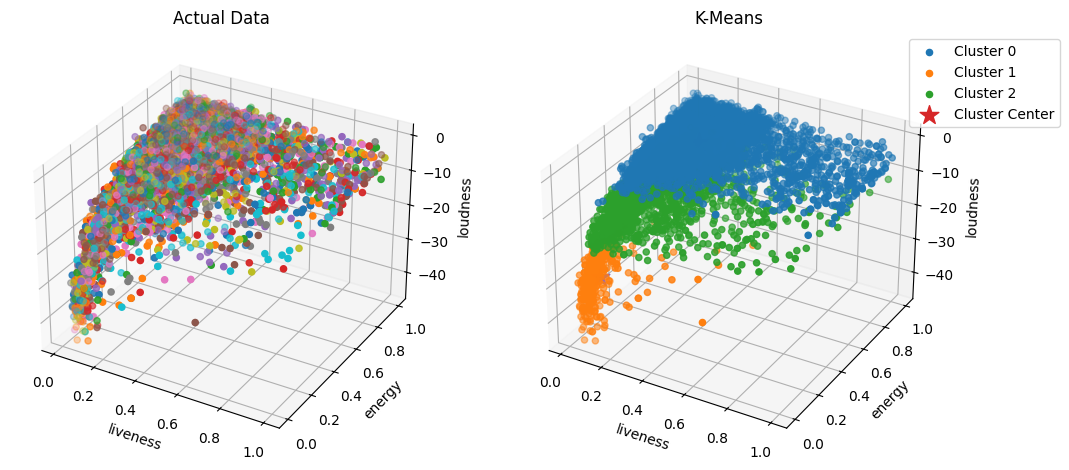

In [131]:
#graph the data so we can understand what is going on.
figure = plt.figure(figsize=(12, 10))#creates 2 subplots
ax = figure.add_subplot(121, projection='3d') # Create a 3D subplot using projection='3d'
ax2 = figure.add_subplot(122, projection='3d')

groups = data.groupby("Artist")#groups the data based on artist name

for name, group in groups:
  x = group.Liveness
  y = group.Energy
  z = group.Loudness
  ax.scatter(x, y, z)
ax.set_title("Actual Data")
ax.set_xlabel("liveness")
ax.set_ylabel("energy")
ax.set_zlabel("loudness")

for cluster_id in sorted(k_clusters.keys()): #plots each cluster
    x, y, z = k_clusters[cluster_id] #unpack the 3 lists of data
    ax2.scatter(x, y, z, label=f"Cluster {cluster_id}")
ax2.set_title("K-Means")
ax2.set_xlabel("liveness")
ax2.set_ylabel("energy")
ax2.set_zlabel("loudness")

# plot each cluster with a label so we can create a legend
center_label_added = False
for center in c_centers:#plots the center of the clusters
    x, y, z = center
    if not center_label_added:
        ax2.scatter(x, y, z, marker="*", s=200, label="Cluster Center")
        center_label_added = True
    else:
        ax2.scatter(x, y, z, marker="*", s=200)

# add legend only to the clusters subplot
ax2.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))

plt.show()

In [132]:
# I really wanted to see these graphs from different angles, so I had chatGPT
# help me create an interactive 3D view using plotly. Then I realized it would be
# super helpful to have the artists included on each point. It's so cool!

import plotly.graph_objects as go
import numpy as np


# Define colors for each cluster
colors = ['red', 'blue', 'green', 'orange']

# Create an interactive 3D Plotly figure
fig = go.Figure()

# Loop over each cluster to add points with custom hover text
for cluster in range(num_C):
    # Get indices of points that belong to the current cluster
    cluster_indices = [i for i in range(len(X)) if y_km[i] == cluster]
    # Extract the corresponding points and artist names
    cluster_points = np.array([X[i] for i in cluster_indices])
    cluster_artists = [artists[i] for i in cluster_indices]

    # Build custom hover text for each point in the cluster
    hover_text = [
        f"Artist: {artist}<br>Liveness: {point[0]:.2f}<br>Energy: {point[1]:.2f}<br>Loudness: {point[2]:.2f}<br>Cluster: {cluster}"
        for artist, point in zip(cluster_artists, cluster_points)
    ]

    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=5, color=colors[cluster]),
        name=f"Cluster {cluster}",
        hovertext=hover_text,
        hoverinfo='text'
    ))

# Add cluster centers to the plot with their own hover text
centers = np.array(c_centers)
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(size=10, symbol='x', color='black'),
    name="Centers",
    hovertemplate="Center<br>Liveness: %{x:.2f}<br>Energy: %{y:.2f}<br>Loudness: %{z:.2f}<extra></extra>"
))

fig.update_layout(
    title="Interactive 3D K-Means Clusters",
    scene=dict(
        xaxis_title="Liveness",
        yaxis_title="Energy",
        zaxis_title="Loudness"
    )
)

fig.show()


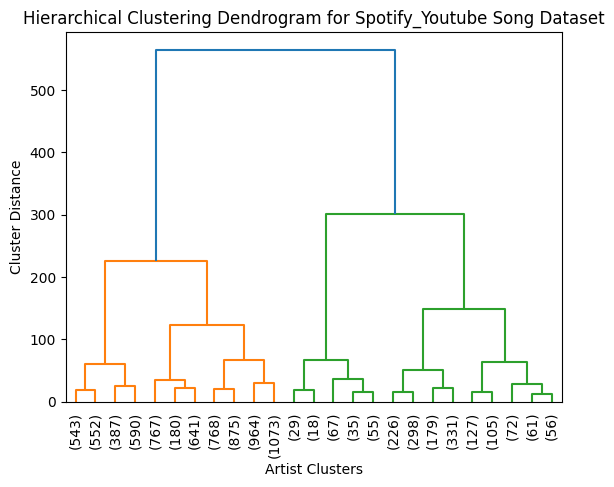

In [133]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# reference columns we care about
X = df[['Liveness', 'Energy', 'Loudness']].to_numpy()

# use linkage to calculate hierarchical clustering
linked = linkage(X, 'ward')

# create dendrogram with linkage matrix
dendrogram(linked,
           truncate_mode='lastp',
           p=25, # collapse labels to make x axis intelligible
           leaf_rotation=90,
           leaf_font_size=10)

plt.title('Hierarchical Clustering Dendrogram for Spotify_Youtube Song Dataset')
plt.xlabel('Artist Clusters')
plt.ylabel('Cluster Distance')
plt.show()

In [134]:
from scipy.cluster.hierarchy import fcluster

# cut the dendrogram into three clusters and add to dataframe
clusters = fcluster(linked, t=3, criterion='maxclust')
df['Cluster'] = clusters

# group by cluster and compute min/max for each feature
cluster_summary = df.groupby('Cluster')[['Liveness', 'Energy', 'Loudness']].agg(['min', 'max'])

print(cluster_summary)


        Liveness          Energy        Loudness        
             min    max      min    max      min     max
Cluster                                                 
1         0.0145  1.000  0.09640  0.997  -12.159  -0.140
2         0.0418  0.635  0.00194  0.155  -44.761 -25.933
3         0.0190  0.910  0.01200  0.890  -25.773 -11.866
